Question: What’s the geographic distribution of EVs across counties, and how does electric range vary by make?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Read the CSV into a data frame
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\EV_Data_Analysis\CSV\Electric_Vehicle_Population_Data.csv')


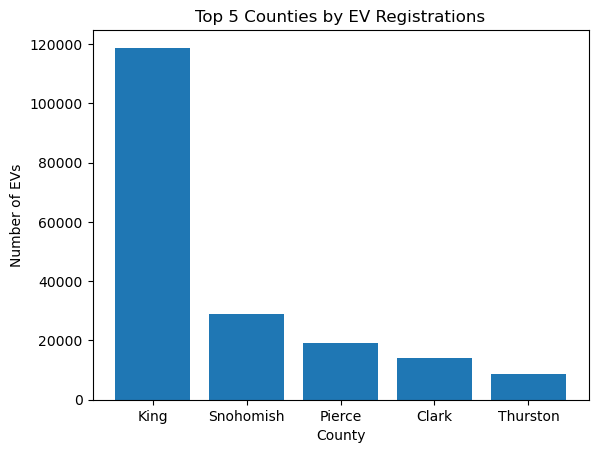

In [4]:
# Top 5 counties by EV count
top_counties = df['County'].value_counts().nlargest(5)

# Plotting the top 5 counties
plt.bar(top_counties.index, top_counties.values)
plt.title('Top 5 Counties by EV Registrations')
plt.xlabel('County')
plt.ylabel('Number of EVs')
plt.show()

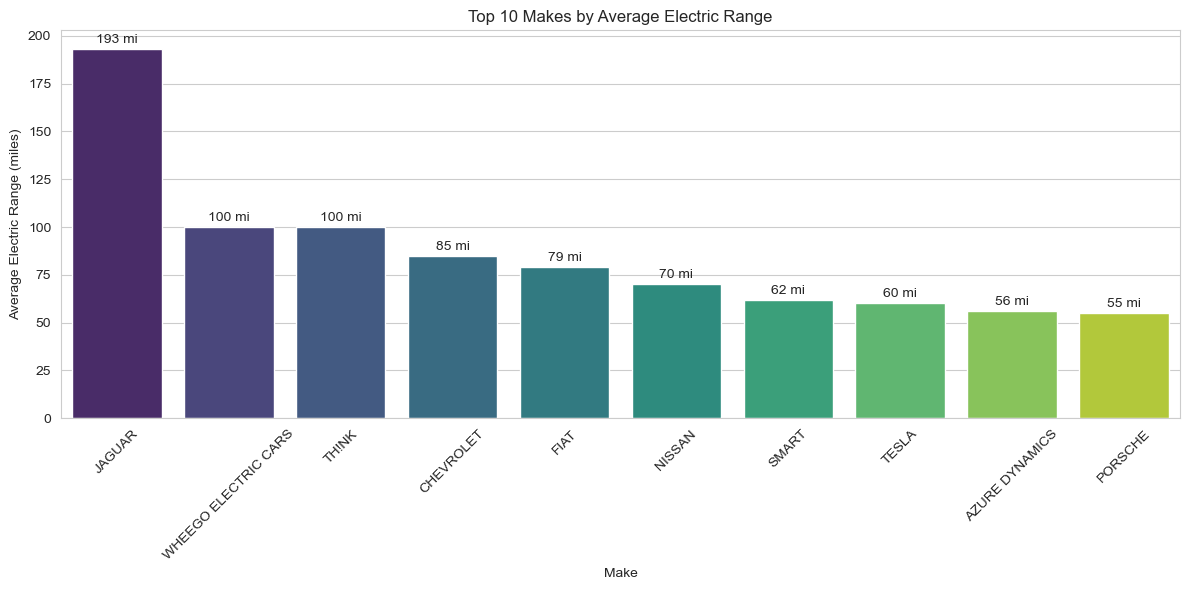

In [10]:
# Compute top 10 car makes by average electric range
mean_ranges = df.groupby('Make', observed=True)['Electric Range'].mean().sort_values(ascending=False).head(10)

# Bar plot with fixed hue
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_ranges.index, y=mean_ranges.values, hue=mean_ranges.index, palette='viridis', legend=False)

# Labels and titles
plt.ylabel('Average Electric Range (miles)')
plt.title('Top 10 Makes by Average Electric Range')
plt.xticks(rotation=45)

# Annotate bars
for i, val in enumerate(mean_ranges.values):
    plt.text(i, val + 3, f"{val:.0f} mi", ha='center')

plt.tight_layout()
plt.show()


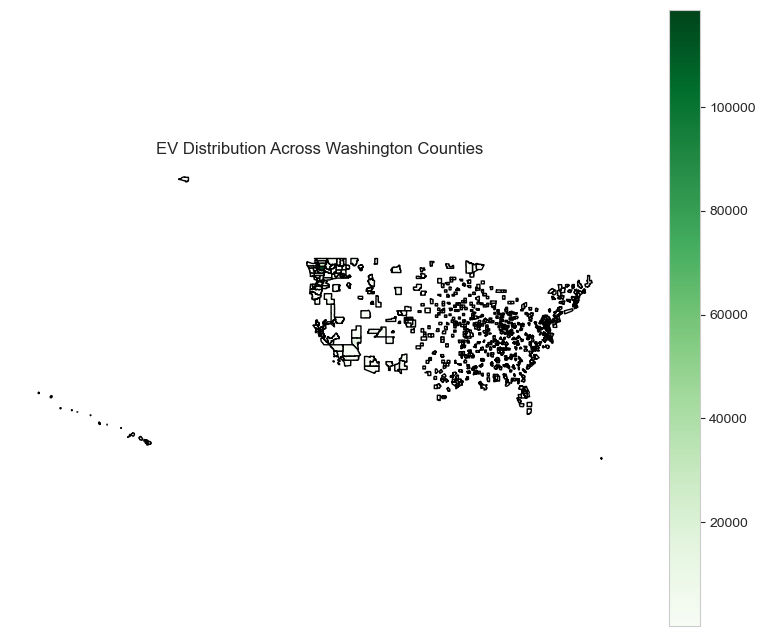

In [11]:
# Load Washington counties shapefile
#wa_counties = gpd.read_file("path_to/wa_counties_shapefile.shp")  # replace with your path
wa_counties = gpd.read_file(r'C:\Users\ADMIN\Desktop\EV_Data_Analysis\shapefiles\tl_2022_us_county\tl_2022_us_county.shp')

# Aggregate EV count by county
county_counts = df['County'].value_counts().reset_index()
county_counts.columns = ['County', 'EV Count']

# Merge with geodata
geo_df = wa_counties.merge(county_counts, left_on='NAME', right_on='County')

# Plot choropleth
geo_df.plot(column='EV Count', cmap='Greens', legend=True, figsize=(10, 8), edgecolor='black')
plt.title('EV Distribution Across Washington Counties')
plt.axis('off')
plt.show()


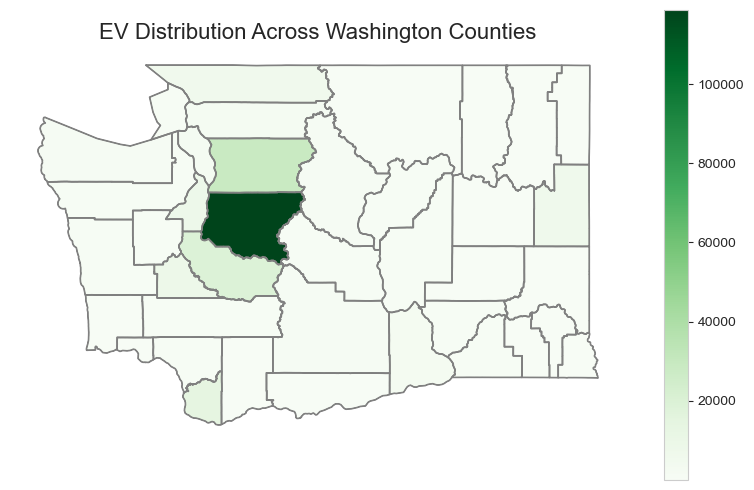

In [15]:
# Load US counties shapefile
wa_counties = gpd.read_file(r'C:\Users\ADMIN\Desktop\EV_Data_Analysis\shapefiles\tl_2022_us_county\tl_2022_us_county.shp')

# Filter to Washington state only (FIPS code 53 for WA)
wa_counties = wa_counties[wa_counties['STATEFP'] == '53']

# Prepare EV counts
county_counts = df['County'].value_counts().reset_index()
county_counts.columns = ['County', 'EV Count']

# Merge county EV data with geospatial data
geo_df = wa_counties.merge(county_counts, left_on='NAME', right_on='County', how='left')
geo_df['EV Count'] = geo_df['EV Count'].fillna(0)

# Plot styled choropleth with a more compact figure size
fig, ax = plt.subplots(figsize=(8, 5))  # Reduced size for a more compact plot
geo_df.boundary.plot(ax=ax, linewidth=1.2, color='gray')  # Clear outlines for boundaries
geo_df.plot(column='EV Count',
            cmap='Greens',
            legend=True,
            linewidth=0.5,
            edgecolor='black',
            ax=ax)

# Add styling
ax.set_title('EV Distribution Across Washington Counties', fontsize=16)
ax.axis('off')

plt.tight_layout()
plt.show()
